# Introduction to Computer Vision and Convolutional Neural Network

> It is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.


**Food_Vision(Link)** -> https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip


**Dataset(Link)** -> https://www.kaggle.com/datasets/dansbecker/food-101


> However, we are only using two(pizza and steak) out of the 101 total labels from the food-101 dataset. We have achived using the *image_data_modification.ipynb* notebook.

**link** -> https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> We are starting small so that we can experiment and improve quickly and figure out which works and which doesn't work before scalling up.


## Getting the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip

zip_ref= zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-22 13:23:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   197MB/s    in 0.5s    

2022-07-22 13:23:23 (197 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspecting the data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Find the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories, {len(filenames)} images in '{dirpath}'. ")

There are 2 directories, 0 images in 'pizza_steak'. 
There are 2 directories, 0 images in 'pizza_steak/train'. 
There are 0 directories, 750 images in 'pizza_steak/train/pizza'. 
There are 0 directories, 750 images in 'pizza_steak/train/steak'. 
There are 2 directories, 0 images in 'pizza_steak/test'. 
There are 0 directories, 250 images in 'pizza_steak/test/pizza'. 
There are 0 directories, 250 images in 'pizza_steak/test/steak'. 


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jul 22 13:23 .
drwxr-xr-x 1 root root 4096 Jul 22 13:23 ..
drwxr-xr-x 4 root root 4096 Jul 22 13:23 test
drwxr-xr-x 4 root root 4096 Jul 22 13:23 train


In [7]:
# Find the length of images in a file

len_steak_train_images=len(os.listdir("/content/pizza_steak/train/pizza"))
len_steak_train_images

750

## Visualizing the images

In [8]:
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/pizza_steak/train")
# Creates a list of class_names from the sub-directory
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names), class_names

['pizza' 'steak']


(None, array(['pizza', 'steak'], dtype='<U5'))

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline
import random

def view_random_image(target_dir,target_class):

  """
    target_dir and target_class are in string format.
  """

  # Target directory to view images
  target_folder= target_dir + target_class

  # Random Image path
  random_image= random.sample(os.listdir(target_folder),1)

  print(random_image)

  # Plotting and reading the images
  img= mping.imread(target_folder + "/"  + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Shape of the image

  return img



['1183278.jpg']
Image shape: (512, 512, 3)


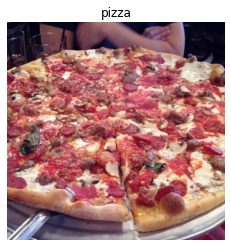

In [10]:
img=view_random_image(target_dir="/content/pizza_steak/train/", target_class="pizza")

In [11]:
img

array([[[ 43,  50,  68],
        [ 47,  52,  71],
        [ 52,  57,  76],
        ...,
        [ 14,  13,  29],
        [ 13,  12,  28],
        [ 13,  12,  28]],

       [[ 48,  53,  72],
        [ 48,  53,  72],
        [ 47,  52,  71],
        ...,
        [ 12,  11,  27],
        [ 11,  10,  26],
        [ 10,   9,  25]],

       [[ 36,  41,  60],
        [ 34,  39,  58],
        [ 29,  34,  53],
        ...,
        [  8,   7,  23],
        [  8,   7,  23],
        [  7,   6,  22]],

       ...,

       [[164, 165, 169],
        [206, 207, 211],
        [246, 250, 253],
        ...,
        [111,  45,  81],
        [117,  51,  87],
        [122,  56,  92]],

       [[193, 197, 200],
        [241, 245, 248],
        [251, 255, 255],
        ...,
        [110,  44,  80],
        [115,  49,  85],
        [119,  53,  89]],

       [[231, 235, 238],
        [235, 239, 242],
        [238, 243, 246],
        ...,
        [107,  41,  77],
        [113,  47,  83],
        [116,  50,  86]]

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 43,  50,  68],
        [ 47,  52,  71],
        [ 52,  57,  76],
        ...,
        [ 14,  13,  29],
        [ 13,  12,  28],
        [ 13,  12,  28]],

       [[ 48,  53,  72],
        [ 48,  53,  72],
        [ 47,  52,  71],
        ...,
        [ 12,  11,  27],
        [ 11,  10,  26],
        [ 10,   9,  25]],

       [[ 36,  41,  60],
        [ 34,  39,  58],
        [ 29,  34,  53],
        ...,
        [  8,   7,  23],
        [  8,   7,  23],
        [  7,   6,  22]],

       ...,

       [[164, 165, 169],
        [206, 207, 211],
        [246, 250, 253],
        ...,
        [111,  45,  81],
        [117,  51,  87],
        [122,  56,  92]],

       [[193, 197, 200],
        [241, 245, 248],
        [251, 255, 255],
        ...,
        [110,  44,  80],
        [115,  49,  85],
        [119,  53,  89]],

       [[231, 235, 238],
        [235, 239, 242],
        [238, 243, 246],
        ...,
        [107,  41,  7

In [13]:
img.shape

(512, 512, 3)

In [14]:
(img/255.0)[:5]

array([[[0.16862745, 0.19607843, 0.26666667],
        [0.18431373, 0.20392157, 0.27843137],
        [0.20392157, 0.22352941, 0.29803922],
        ...,
        [0.05490196, 0.05098039, 0.11372549],
        [0.05098039, 0.04705882, 0.10980392],
        [0.05098039, 0.04705882, 0.10980392]],

       [[0.18823529, 0.20784314, 0.28235294],
        [0.18823529, 0.20784314, 0.28235294],
        [0.18431373, 0.20392157, 0.27843137],
        ...,
        [0.04705882, 0.04313725, 0.10588235],
        [0.04313725, 0.03921569, 0.10196078],
        [0.03921569, 0.03529412, 0.09803922]],

       [[0.14117647, 0.16078431, 0.23529412],
        [0.13333333, 0.15294118, 0.22745098],
        [0.11372549, 0.13333333, 0.20784314],
        ...,
        [0.03137255, 0.02745098, 0.09019608],
        [0.03137255, 0.02745098, 0.09019608],
        [0.02745098, 0.02352941, 0.08627451]],

       [[0.05490196, 0.07843137, 0.14117647],
        [0.04705882, 0.07058824, 0.13333333],
        [0.03529412, 0.05882353, 0.

## Build a CNN model

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
tf.random.set_seed(42)

# Preprocess the data
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

# Paths to data directory

train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

# Turning into batches
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)


valid_data= valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)


# Build a CNN model

cnn_1= tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
                tf.keras.layers.Conv2D(10, 3, activation="relu"),
                tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
                tf.keras.layers.Conv2D(10, 3, activation="relu",),
                tf.keras.layers.Conv2D(10, 3, activation="relu",),
                tf.keras.layers.MaxPool2D(2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile Model

cnn_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model

history_1= cnn_1.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data= valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 22s 205ms/step - loss: 0.5434 - accuracy: 0.7293 - val_loss: 0.3806 - val_accuracy: 0.8560
Epoch 2/10
47/47 [==============================] - 9s 189ms/step - loss: 0.4060 - accuracy: 0.8187 - val_loss: 0.3352 - val_accuracy: 0.8500
Epoch 3/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3851 - accuracy: 0.8347 - val_loss: 0.3792 - val_accuracy: 0.8160
Epoch 4/10
47/47 [==============================] - 9s 191ms/step - loss: 0.3710 - accuracy: 0.8267 - val_loss: 0.3405 - val_accuracy: 0.8420
Epoch 5/10
47/47 [==============================] - 9s 193ms/step - loss: 0.3133 - accuracy: 0.8753 - val_loss: 0.2952 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 9s 191ms/step - loss: 0.2771 - accuracy: 0.8913 - val_loss: 0.2930 - val_accuracy: 0.8840
Epoch 7/10
47/47 [==============================] - 9s 189ms/ste

In [17]:
len(train_data)

47

In [18]:
1500/32 # So '47' are the number of batches we are using here.

46.875

In [19]:
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Building a non-cnn model

In [20]:
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(224,224,3)),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(100, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

history_2= model_2.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data= valid_data, validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 183ms/step - loss: 1.7640 - accuracy: 0.6020 - val_loss: 0.8934 - val_accuracy: 0.6560
Epoch 2/10
47/47 [==============================] - 9s 186ms/step - loss: 0.7160 - accuracy: 0.6967 - val_loss: 0.6971 - val_accuracy: 0.6680
Epoch 3/10
47/47 [==============================] - 8s 177ms/step - loss: 0.6191 - accuracy: 0.7187 - val_loss: 0.6370 - val_accuracy: 0.7040
Epoch 4/10
47/47 [==============================] - 8s 176ms/step - loss: 0.5109 - accuracy: 0.7693 - val_loss: 0.4670 - val_accuracy: 0.7680
Epoch 5/10
47/47 [==============================] - 8s 179ms/step - loss: 0.5065 - accuracy: 0.7740 - val_loss: 0.5589 - val_accuracy: 0.7040
Epoch 6/10
47/47 [==============================] - 8s 176ms/step - loss: 0.6056 - accuracy: 0.7353 - val_loss: 0.4450 - val_accuracy: 0.7700
Epoch 7/10
47/47 [==============================] - 8s 175ms/step - loss: 0.4586 - accuracy: 0.7847 - val_loss: 0.4438 - val_accuracy: 0.7740
Epoch 

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,083,301
Trainable params: 15,083,301


In [22]:
15083301/31000

486.55809677419353

In [23]:
cnn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [24]:
cnn_1.evaluate(valid_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.4075 - accuracy: 0.8500


[0.40754690766334534, 0.8500000238418579]

In [25]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 129ms/step - loss: 0.4377 - accuracy: 0.7860


[0.43769481778144836, 0.7860000133514404]

## Conclusion

> This is the power of *CNN* even though it had 30K+ trainable params, and the *non CNN* model which had over 15M+ trainable params, which is almost *500 times* more than that of the *CNN* model. The accuracy was no way close to that of the *CNN* model.

>The evaluation of the *CNN* model was *0.846* or *84.6%* accurate

>The evaluation of the *non CNN* model was *0.772* or *77.2%* accurate

## Binary Classification

### Visualize the data

['1202925.jpg']
Image shape: (512, 512, 3)
['332557.jpg']
Image shape: (289, 512, 3)


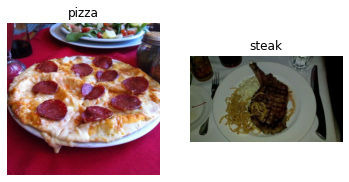

In [26]:
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("/content/pizza_steak/train/", "pizza")
plt.subplot(1,2,2)
steak_img=view_random_image("/content/pizza_steak/train/", "steak")

### Preprocess the data

In [27]:
train_dir, test_dir

('/content/pizza_steak/train', '/content/pizza_steak/test')

In [28]:
!nvidia-smi

Fri Jul 22 13:26:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    31W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

In [30]:
train_data= train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)

Found 1500 images belonging to 2 classes.


In [31]:
test_data= test_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224), 
                                              class_mode="binary", 
                                              seed=42)

Found 500 images belonging to 2 classes.


In [32]:
images, labels= train_data.next() # Get the 'next' batches of images/labels in the train_data

len(images), len(labels)

(32, 32)

In [33]:
images[:1], images.shape, images[1].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [34]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

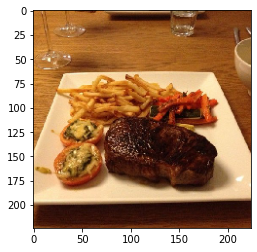

In [35]:
plt.imshow(images[5])

## Building a CNN baseline model

> Baseline model is a model which we build with general/default parameters and try to tweak the parameters to get better results than the baseline model.

> In deep learning, there is almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works on the data and then introduce complexity as required(e.g look at which current model is performing best in the filed of the problem we are currently working.


In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [37]:
model_3= Sequential([
            Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",activation="relu", input_shape=(224,224,3)), # Input Layer
            Conv2D(10,3, activation="relu"),
            Conv2D(10,3, activation="relu"),
            Flatten(),
            Dense(1, activation="sigmoid") # Output layer, 1 output as it is a binary classification
])

In [38]:
model_3.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=['accuracy'])

In [39]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_6 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_3=model_3.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 10s 199ms/step - loss: 1.0266 - accuracy: 0.6527 - val_loss: 0.4714 - val_accuracy: 0.7960
Epoch 2/20
47/47 [==============================] - 9s 191ms/step - loss: 0.4289 - accuracy: 0.8147 - val_loss: 0.3793 - val_accuracy: 0.8500
Epoch 3/20
47/47 [==============================] - 9s 193ms/step - loss: 0.3328 - accuracy: 0.8693 - val_loss: 0.3855 - val_accuracy: 0.8380
Epoch 4/20
47/47 [==============================] - 9s 192ms/step - loss: 0.2204 - accuracy: 0.9233 - val_loss: 0.3643 - val_accuracy: 0.8400
Epoch 5/20
47/47 [==============================] - 9s 190ms/step - loss: 0.1108 - accuracy: 0.9733 - val_loss: 0.4356 - val_accuracy: 0.8100
Epoch 6/20
47/47 [==============================] - 9s 202ms/step - loss: 0.0532 - accuracy: 0.9927 - val_loss: 0.4393 - val_accuracy: 0.8360
Epoch 7/20
47/47 [==============================] - 9s 190ms/step - loss: 0.0352 - accuracy: 0.9940 - val_loss: 0.4924 - val_accuracy: 0.8260
Epoch

In [41]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.7421 - accuracy: 0.8340


[0.7421478033065796, 0.8339999914169312]

In [42]:
model_2.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 0.4377 - accuracy: 0.7860


[0.43769484758377075, 0.7860000133514404]

In [43]:
cnn_1.evaluate(test_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.4075 - accuracy: 0.8500


[0.40754684805870056, 0.8500000238418579]

## Evaluating the model

In [44]:
import pandas as pd

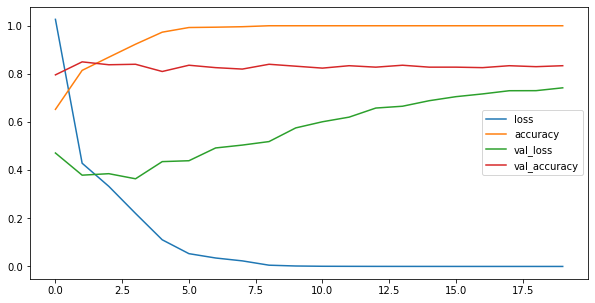

In [45]:
pd.DataFrame(history_3.history).plot(figsize=(10,5))

> When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training datset too well and this the model's ability to generalize to unseen data will be diminished.